# Feedforward Networks

In [0]:
# Load all necessary libraries
from __future__ import absolute_import, division, print_function, unicode_literals
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf
import tensorflow_datasets as tfds
!pip install tensorflow-hub
!pip install tfds-nightly
import tensorflow_hub as hub
import numpy as np
import keras
import pandas as pd
from keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline

TensorFlow 2.x selected.


Using TensorFlow backend.


# MNIST Example
The MNIST data set includes handwritten digits with corresponding labels. 
* Training set: 60,000 images of handwritten digits and corresponding labels. Each digit is represented as a 28 x 28 matrix of grayscale values 0 - 255. The entire training set is stored in a 3D tensor of shape (60000, 28, 28). 
* The corresponding image values are stored as a 1D tensor of values 0 - 9. Testing set: 10,000 images with the same set up as the training set


In [0]:
# The MNIST dataset is one of the built-in datasets available through keras
mnist = tf.keras.datasets.mnist

# Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Divide numbers by 255 to scale between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Make labels into vectors of 0s and 1s
y_train = to_categorical(y_train)
y_test  = to_categorical(y_test)


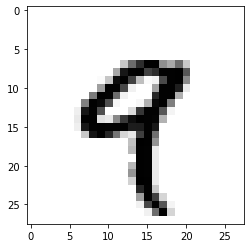

In [0]:
# Let's take a look at one of the training examples
digit = x_train[4] # Randomly chose index 4 
plt.imshow(digit, cmap = plt.cm.binary)
plt.show()

In [0]:
# Let's look at how many training examples we have
x_train.shape

(60000, 28, 28)

In [0]:
# Define model
model = tf.keras.models.Sequential([
  # Make 28x28 image a vector of length 28*28 = 784 with Flatten
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  # Layer 1 (Hidden layer)
  tf.keras.layers.Dense(512, activation='relu'),
  # Layer 2 (Output layer)
  tf.keras.layers.Dense(10, activation='softmax')
])

# Define how to execute training
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the network
model.fit(x_train, y_train, epochs=5, batch_size=128)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 83us/sample - loss: 0.2549 - accuracy: 0.9268
Epoch 2/5
60000/60000 [==============================] - 5s 75us/sample - loss: 0.1025 - accuracy: 0.9694
Epoch 3/5
60000/60000 [==============================] - 4s 74us/sample - loss: 0.0675 - accuracy: 0.9794
Epoch 4/5
60000/60000 [==============================] - 4s 72us/sample - loss: 0.0492 - accuracy: 0.9852
Epoch 5/5
60000/60000 [==============================] - 4s 74us/sample - loss: 0.0377 - accuracy: 0.9886


In [0]:
# Evaluate the model with test data
model.evaluate(x_test,  y_test, verbose=2)

10000/10000 - 1s - loss: 0.0711 - accuracy: 0.9788


[0.07107335027277004, 0.9788]

The first value of the output is the test set loss. The second value in the test set accuracy. We see we get a test set accuracy of 97.88%. Note that this accuracy is slightly lower than the training set accuracy from the final epoch. This gap between training accuracy and test accuracy is an example of "overfitting", the fact that machine learning models tend to perform worse on new data than on their training data. We'll cover this topic in a later lecture. 



# IMDb Example
We'll use the IMDB dataset that contains the text of 50,000 movie reviews from the Internet Movie Database. These are split into 25,000 reviews for training and 25,000 reviews for testing. The training and testing sets are balanced, meaning they contain an equal number of positive and negative reviews.

In [0]:
imdb = tf.keras.datasets.imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 0s 0us/step


The argument `num_words=10000` means that we will only keep the top 10,000 most frequently occurring words in the training data. Rare words will be discarded. This allows us to work with vector data of manageable size.

The variables `train_data` and `test_data` are lists of reviews, each review being a list of word indices (encoding a sequence of words). `train_labels` and `test_labels` are lists of 0s and 1s, where 0 stands for "negative" and 1 stands for "positive":

In [0]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [0]:
train_labels[0]

1

In [0]:
# word_index is a dictionary mapping words to an integer index
word_index = imdb.get_word_index()
# We reverse it, mapping integer indices to words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# We decode the review; note that our indices were offset by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

1646592/1641221 [==============================] - 0s 0us/step


In [0]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

### Preparing the data
We cannot feed lists of integers into a neural network. We have to turn our lists into tensors. There are two ways we could do that:

1. We could pad our lists so that they all have the same length, and turn them into an integer tensor of shape (samples, word_indices), then use as first layer in our network a layer capable of handling such integer tensors (the Embedding layer, which we will cover in detail later in the book).
2. We could one-hot-encode our lists to turn them into vectors of 0s and 1s. Concretely, this would mean for instance turning the sequence [3, 5] into a 10,000-dimensional vector that would be all-zeros except for indices 3 and 5, which would be ones. Then we could use as first layer in our network a Dense layer, capable of handling floating point vector data.

We will go with the latter solution. Let's vectorize our data, which we will do manually.

In [0]:
def vectorize_sequences(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test  = vectorize_sequences(test_data)

Here's what our samples look like now:

In [0]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

We should also vectorize our labels, which is straightforward:

In [0]:
y_train = np.asarray(train_labels).astype('float32')
y_test  = np.asarray(test_labels).astype('float32')

### Building the network
Our input data is simply vectors, and our labels are scalars (1s and 0s): this is the easiest setup you will ever encounter. A type of network that performs well on such a problem would be a simple stack of fully-connected (`Dense`) layers with `relu` activations: `Dense(16, activation='relu'`)

The argument being passed to each `Dense` layer (16) is the number of "hidden units" of the layer. Having 16 hidden units means that the weight matrix `W` will have shape (`input_dimension`, 16), i.e. the dot product with `W` will project the input data onto a 16-dimensional representation space (and then we would add the bias vector b and apply the `relu` operation). You can intuitively understand the dimensionality of your representation space as "how much freedom you are allowing the network to have when learning internal representations". **Having more hidden units (a higher-dimensional representation space) allows your network to learn more complex representations, but it makes your network more computationally expensive and may lead to learning unwanted patterns (patterns that will improve performance on the training data but not on the test data)**.

Here we will use an architecture consisting of two intermediate layers with 16 hidden units each, and a third layer which will output the scalar prediction regarding the sentiment of the current review. The intermediate layers will use `relu` as their activation function, and the final layer will use a `sigmoid` activation so as to output a probability (a score between 0 and 1, indicating how likely the sample is to have the target "1", i.e. how likely the review is to be positive). A `relu` is a function meant to zero-out negative values, while a sigmoid "squashes" arbitrary values into the [0, 1] interval, thus outputting something that can be interpreted as a probability.

In [0]:
# Define model
model = tf.keras.models.Sequential([
  # Layer 1 (Hidden layer)
  tf.keras.layers.Dense(16, activation='relu'),
  # Layer 2 (Hidden layer)
  tf.keras.layers.Dense(16, activation='relu'),
  # Layer 3 (Output layer)
  tf.keras.layers.Dense(1, activation='sigmoid')
])

Finally, we need to pick a loss function and an optimizer. Since we are facing a binary classification problem and the output of our network is a probability (we end our network with a single-unit layer with a `sigmoid` activation), is it best to use the `binary_crossentropy` loss. It isn't the only viable choice: you could use, for instance, `mean_squared_error`. But **crossentropy is usually the best choice when you are dealing with models that output probabilities**. Crossentropy is a quantity from the field of Information Theory, that measures the "distance" between probability distributions, or in our case, between the ground-truth distribution and our predictions.

Here's the step where we configure our model with the `rmsprop` optimizer and the `binary_crossentropy` loss function. Note that we will also monitor accuracy during training.

In [0]:
# Define how to execute training
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

### Validation
In order to monitor during training the accuracy of the model on data that it has never seen before, we will create a "validation set" by setting apart 10,000 samples from the original training data:

In [0]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

We will now train our model for 20 epochs (20 iterations over all samples in the `x_train` and `y_train` tensors), in mini-batches of 512 samples. At this same time we will monitor loss and accuracy on the 10,000 samples that we set apart. This is done by passing the validation data as the validation_data argument:

In [0]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 167us/sample - loss: 0.5378 - accuracy: 0.7837 - val_loss: 0.4326 - val_accuracy: 0.8379
Epoch 2/20
15000/15000 [==============================] - 2s 113us/sample - loss: 0.3253 - accuracy: 0.9004 - val_loss: 0.3285 - val_accuracy: 0.8746
Epoch 3/20
15000/15000 [==============================] - 2s 116us/sample - loss: 0.2367 - accuracy: 0.9257 - val_loss: 0.2840 - val_accuracy: 0.8896
Epoch 4/20
15000/15000 [==============================] - 2s 121us/sample - loss: 0.1854 - accuracy: 0.9415 - val_loss: 0.2824 - val_accuracy: 0.8856
Epoch 5/20
15000/15000 [==============================] - 2s 113us/sample - loss: 0.1504 - accuracy: 0.9516 - val_loss: 0.2889 - val_accuracy: 0.8830
Epoch 6/20
15000/15000 [==============================] - 2s 116us/sample - loss: 0.1249 - accuracy: 0.9619 - val_loss: 0.3383 - val_accuracy: 0.8688
Epoch 7/20
15000/15000 [==========================

Note that the call to `model.fit()` returns a `History` object. This object has a member `history`, which is a dictionary containing data about everything that happened during training. It contains 4 entries: one per metric that was being monitored, during training and during validation.

In [0]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Let's plot the training and validation loss side by side, as well as the training and validation accuracy:

In [0]:
import seaborn as sns
sns.set()

train_acc  = history.history['accuracy']
train_loss = history.history['loss']
val_acc  = history.history['val_accuracy']
val_loss = history.history['val_loss']

epochs = range(1, len(train_acc) + 1)

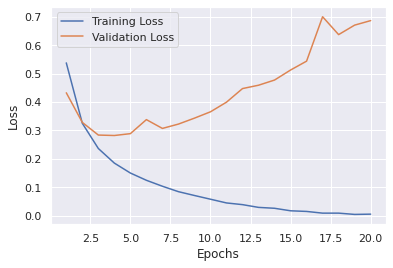

In [0]:
plt.plot(epochs, train_loss, label = 'Training Loss')
plt.plot(epochs, val_loss, label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

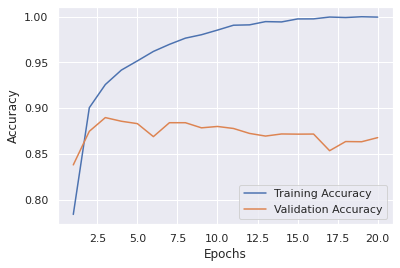

In [0]:
plt.plot(epochs, train_acc, label = 'Training Accuracy')
plt.plot(epochs, val_acc, label = 'Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

As you can see, the training loss decreases with every epoch and the training accuracy increases with every epoch. That's what you would expect when running gradient descent optimization -- the quantity you are trying to minimize should get lower with every iteration. But that isn't the case for the validation loss and accuracy: they seem to peak at the fourth epoch. This is an example of what we were warning against earlier: a model that performs better on the training data isn't necessarily a model that will do better on data it has never seen before. In precise terms, what you are seeing is "overfitting": after the second epoch, we are over-optimizing on the training data, and we ended up learning representations that are specific to the training data and do not generalize to data outside of the training set.

In this case, to prevent overfitting, we could simply stop training after three epochs. In general, there is a range of techniques you can leverage to mitigate overfitting, which we will cover in later lectures.

Let's train a new network from scratch for four epochs, then evaluate it on our test data:

In [0]:
# Define model
model = tf.keras.models.Sequential([
  # Layer 1 (Hidden layer)
  tf.keras.layers.Dense(16, activation='relu'),
  # Layer 2 (Hidden layer)
  tf.keras.layers.Dense(16, activation='relu'),
  # Layer 3 (Output layer)
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Define how to execute training
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs = 4, batch_size = 512)
results = model.evaluate(x_test, y_test)

Train on 25000 samples
Epoch 1/4
25000/25000 [==============================] - 2s 95us/sample - loss: 0.4397 - accuracy: 0.8185
Epoch 2/4
25000/25000 [==============================] - 2s 81us/sample - loss: 0.2518 - accuracy: 0.9108
Epoch 3/4
25000/25000 [==============================] - 2s 80us/sample - loss: 0.1967 - accuracy: 0.9295
Epoch 4/4
25000/25000 [==============================] - 2s 81us/sample - loss: 0.2987 - accuracy: 0.8830


In [0]:
results

[0.2986567050886154, 0.88304]

Our fairly naive approach achieves an accuracy of 88%. With state-of-the-art approaches, one should be able to get close to 95%.

### Regularization
It's clear the model is overfitting. How can we mitigate this? We'll cover 3 ways:
1. Reduce network size
2. Weight regularization
3. Dropout

#### Reduce network size
One quick way to reduce the complexity of a model is to reduce it's size by decreasing the number of hidden nodes in one or more hidden layers. Let's reduce our number from 16 to 4 and see how it performs.


In [0]:
# Define model
model2 = tf.keras.models.Sequential([
  # Layer 1 (Hidden layer)
  tf.keras.layers.Dense(4, activation='relu'),
  # Layer 2 (Hidden layer)
  tf.keras.layers.Dense(4, activation='relu'),
  # Layer 3 (Output layer)
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Define how to execute training
model2.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [0]:
history2 = model2.fit(partial_x_train,
                      partial_y_train,
                      epochs=20,
                      batch_size=512,
                      validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 138us/sample - loss: 0.6409 - accuracy: 0.7001 - val_loss: 0.5940 - val_accuracy: 0.7639
Epoch 2/20
15000/15000 [==============================] - 2s 106us/sample - loss: 0.5524 - accuracy: 0.8245 - val_loss: 0.5273 - val_accuracy: 0.8615
Epoch 3/20
15000/15000 [==============================] - 2s 110us/sample - loss: 0.4708 - accuracy: 0.8825 - val_loss: 0.4550 - val_accuracy: 0.8597
Epoch 4/20
15000/15000 [==============================] - 2s 105us/sample - loss: 0.3927 - accuracy: 0.9078 - val_loss: 0.3960 - val_accuracy: 0.8815
Epoch 5/20
15000/15000 [==============================] - 2s 105us/sample - loss: 0.3249 - accuracy: 0.9229 - val_loss: 0.3584 - val_accuracy: 0.8797
Epoch 6/20
15000/15000 [==============================] - 2s 106us/sample - loss: 0.2721 - accuracy: 0.9331 - val_loss: 0.3169 - val_accuracy: 0.8900
Epoch 7/20
15000/15000 [==========================

In [0]:
import seaborn as sns
sns.set()

train_acc2  = history2.history['accuracy']
train_loss2 = history2.history['loss']
val_acc2  = history2.history['val_accuracy']
val_loss2 = history2.history['val_loss']

epochs = range(1, len(train_acc2) + 1)

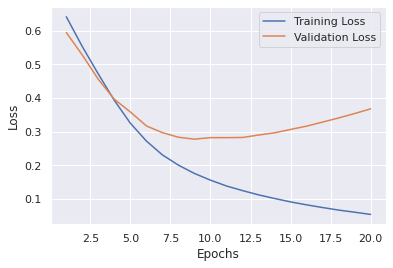

In [0]:
plt.plot(epochs, train_loss2, label = 'Training Loss')
plt.plot(epochs, val_loss2, label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

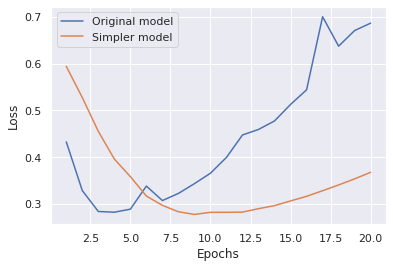

In [0]:
plt.plot(epochs, val_loss, label = 'Original model')
plt.plot(epochs, val_loss2, label = 'Simpler model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

The smaller network performs better than the original model - it starts to overfit around epoch 10 rather than epoch 5. These values are when the validation loss starts to increase.

What happens if we make the model more complex by incrasing 16 to 512?

In [0]:
# Define model
model3 = tf.keras.models.Sequential([
  # Layer 1 (Hidden layer)
  tf.keras.layers.Dense(512, activation='relu'),
  # Layer 2 (Hidden layer)
  tf.keras.layers.Dense(512, activation='relu'),
  # Layer 3 (Output layer)
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Define how to execute training
model3.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [0]:
history3 = model3.fit(partial_x_train,
                      partial_y_train,
                      epochs=20,
                      batch_size=512,
                      validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 10s 640us/sample - loss: 0.5514 - accuracy: 0.7482 - val_loss: 0.3478 - val_accuracy: 0.8573
Epoch 2/20
15000/15000 [==============================] - 9s 608us/sample - loss: 0.2354 - accuracy: 0.9091 - val_loss: 0.6483 - val_accuracy: 0.7537
Epoch 3/20
15000/15000 [==============================] - 9s 609us/sample - loss: 0.1655 - accuracy: 0.9381 - val_loss: 0.3182 - val_accuracy: 0.8801
Epoch 4/20
15000/15000 [==============================] - 9s 604us/sample - loss: 0.0804 - accuracy: 0.9735 - val_loss: 0.4009 - val_accuracy: 0.8799
Epoch 5/20
15000/15000 [==============================] - 9s 601us/sample - loss: 0.1110 - accuracy: 0.9757 - val_loss: 0.3370 - val_accuracy: 0.8859
Epoch 6/20
15000/15000 [==============================] - 9s 600us/sample - loss: 0.0045 - accuracy: 0.9997 - val_loss: 0.5128 - val_accuracy: 0.8878
Epoch 7/20
15000/15000 [=========================

In [0]:
train_acc3  = history3.history['accuracy']
train_loss3 = history3.history['loss']
val_acc3  = history3.history['val_accuracy']
val_loss3 = history3.history['val_loss']

epochs = range(1, len(train_acc3) + 1)

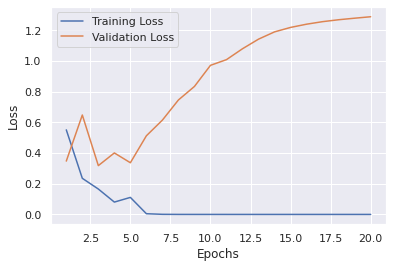

In [0]:
plt.plot(epochs, train_loss3, label = 'Training Loss')
plt.plot(epochs, val_loss3, label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

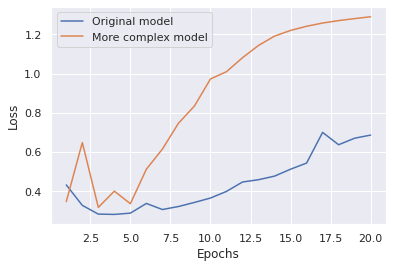

In [0]:
plt.plot(epochs, val_loss, label = 'Original model')
plt.plot(epochs, val_loss3, label = 'More complex model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

The original model performs better than the more complex model with many more hidden nodes.

#### Weight regularization


In [0]:
# L2 model
l2_model = tf.keras.models.Sequential([
  # Layer 1 (Hidden layer)
  tf.keras.layers.Dense(16, activation='relu', 
                        kernel_regularizer = tf.keras.regularizers.l2(0.001)),
  # Layer 2 (Hidden layer)
  tf.keras.layers.Dense(16, activation='relu', 
                        kernel_regularizer = tf.keras.regularizers.l2(0.001)),
  # Layer 3 (Output layer)
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Define how to execute training
l2_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

In [0]:
l2_model_hist = l2_model.fit(x_train, y_train,
                             epochs=20,
                             batch_size=512,
                             validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 4s 152us/sample - loss: 0.5219 - accuracy: 0.8150 - val_loss: 0.4092 - val_accuracy: 0.8712
Epoch 2/20
25000/25000 [==============================] - 3s 131us/sample - loss: 0.3321 - accuracy: 0.9032 - val_loss: 0.3520 - val_accuracy: 0.8802
Epoch 3/20
25000/25000 [==============================] - 3s 131us/sample - loss: 0.2773 - accuracy: 0.9178 - val_loss: 0.3328 - val_accuracy: 0.8862
Epoch 4/20
25000/25000 [==============================] - 3s 134us/sample - loss: 0.2542 - accuracy: 0.9285 - val_loss: 0.3492 - val_accuracy: 0.8786
Epoch 5/20
25000/25000 [==============================] - 3s 132us/sample - loss: 0.2389 - accuracy: 0.9318 - val_loss: 0.3678 - val_accuracy: 0.8722
Epoch 6/20
25000/25000 [==============================] - 3s 132us/sample - loss: 0.2303 - accuracy: 0.9364 - val_loss: 0.3437 - val_accuracy: 0.8842
Epoch 7/20
25000/25000 [==========================

In [0]:
train_accl2  = l2_model_hist.history['accuracy']
train_lossl2 = l2_model_hist.history['loss']
val_accl2  = l2_model_hist.history['val_accuracy']
val_lossl2 = l2_model_hist.history['val_loss']

epochs = range(1, len(train_accl2) + 1)

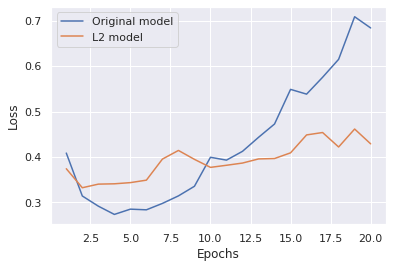

In [0]:
plt.plot(epochs, val_loss, label = 'Original model')
plt.plot(epochs, val_lossl2, label = 'L2 model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

#### Dropout


In [0]:
# Dropout model
dmodel = tf.keras.models.Sequential([
  # Layer 1 (Hidden layer)
  tf.keras.layers.Dense(16, activation='relu'),
  # Dropout layer
  tf.keras.layers.Dropout(0.5),
  # Layer 2 (Hidden layer)
  tf.keras.layers.Dense(16, activation='relu'),
  # Dropout layer
  tf.keras.layers.Dropout(0.5),
  # Layer 3 (Output layer)
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Define how to execute training
dmodel.compile(optimizer='rmsprop',
               loss='binary_crossentropy',
               metrics=['accuracy'])

In [0]:
d_model_hist = dmodel.fit(x_train, y_train,
                             epochs=20,
                             batch_size=512,
                             validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 6s 254us/sample - loss: 0.6068 - accuracy: 0.6710 - val_loss: 0.4630 - val_accuracy: 0.8435
Epoch 2/20
25000/25000 [==============================] - 3s 119us/sample - loss: 0.4510 - accuracy: 0.8090 - val_loss: 0.3346 - val_accuracy: 0.8824
Epoch 3/20
25000/25000 [==============================] - 3s 119us/sample - loss: 0.3542 - accuracy: 0.8644 - val_loss: 0.2871 - val_accuracy: 0.8893
Epoch 4/20
25000/25000 [==============================] - 3s 118us/sample - loss: 0.2949 - accuracy: 0.8908 - val_loss: 0.2765 - val_accuracy: 0.8895
Epoch 5/20
25000/25000 [==============================] - 3s 117us/sample - loss: 0.2549 - accuracy: 0.9106 - val_loss: 0.2852 - val_accuracy: 0.8866
Epoch 6/20
25000/25000 [==============================] - 3s 118us/sample - loss: 0.2285 - accuracy: 0.9173 - val_loss: 0.2862 - val_accuracy: 0.8864
Epoch 7/20
25000/25000 [==========================

In [0]:
train_accd  = d_model_hist.history['accuracy']
train_lossd = d_model_hist.history['loss']
val_accd  = d_model_hist.history['val_accuracy']
val_lossd = d_model_hist.history['val_loss']

epochs = range(1, len(train_accl2) + 1)

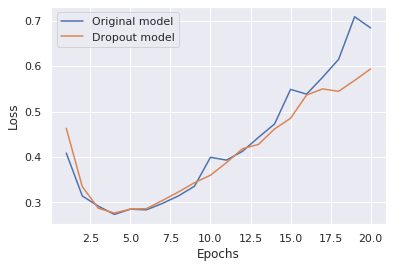

In [0]:
plt.plot(epochs, val_loss, label = 'Original model')
plt.plot(epochs, val_lossd, label = 'Dropout model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()